# Exercise 2 - Final report - Computer simulations of stochastic processes

### Report prepered by Anna Szymanek and Maria Kowalczyk in summer semester of academic year 2019/2020.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us consider 2-dimensional Brownian motion {B1(t), B2(t)}t≥0 with correlated coordinates: Corr(B1(t), B2(t)) = ρ ∈ [−1, 1]. We simulate it using method from article [2].




In [2]:
def two_dimension_brownian(n, rho, dt=0.1):
  dW1 = np.random.normal(0, np.sqrt(dt), n)
  dW2 = rho * dW1 + np.sqrt(1 - rho **2) * np.random.normal(0, np.sqrt(dt), n)
  W1 = np.cumsum(dW1)
  W2 = np.cumsum(dW2)
  return np.vstack((W1, W2)).T

Next method allows us to generate N trajectories of length n.

In [3]:
def generate_trajectories(trajectory_length, rho, n_trajectories, dt=0.1):
  return [two_dimension_brownian(trajectory_length, rho, dt) for _ in range(n_trajectories)]

Now we define estimators of mean square displacement given by the formulas from the Definition 1. in our report task.

$$EA\text{-}MSD(\tau) = \frac{1}{N}\sum_{k=1}^{N}||x_k(\tau)-x_k(0)||^2, \quad\tau = 0,1,...,n$$

In [4]:
def ea_msd(trajectories, tau, ord = 2):
    """
    trajctories: List
    tau: int
    ord: str/int for np.linalg.norm ord argument
    """
    return np.mean([np.linalg.norm(t[tau] - t[0], ord=ord)**2 for t in trajectories])

$$TA\text{-}MSD(k, \tau) = \frac{1}{n+1-\tau}\sum_{t_0=0}^{n-\tau}||x_k(t_0+\tau)-x_k(t_0)||^2, \quad \tau = 0,1,...,n; \quad k = 1, ..., n$$

In [5]:
def ta_msd(trajectory, tau, ord = 2):
    n = trajectory.shape[0] # Length of the sample
    value = np.sum([np.linalg.norm(trajectory[tau+i] - trajectory[i], ord=ord)**2 for i in range(n-tau)])
    return value/(n+1-tau)

$$EA\text{-}TA\text{-}MSD(\tau) = \frac{1}{N}\sum_{k=1}^{N}TA\text{-}MSD(k,\tau); \quad \tau = 0,1,...,n$$

In [6]:
def ea_ta_msd(trajectories, tau, ord = 2):
    return np.mean([ta_msd(t, tau, ord) for t in trajectories])

For all us calculations we use three norms:
* Euclidean norm
* Taxicab norm
* maximum norm.

For this purpose we use method norm from numpy.linalg package.

This function is able to return one of eight different matrix norms, or one of an infinite number of vector norms (described below), depending on the value of the ord parameter.

Parameters:
* xarray_like

* ord {non-zero int, inf, -inf, ‘fro’, ‘nuc’}

Returns:
Norm of the matrix or vector(s).

We use the following parameters for the ord:
* inf - max(sum(abs(x), axis=1)) to consider maximum norm
* 1 - max(sum(abs(x), axis)) to consider taxicab
* 2-norm (largest sing. value) to consider Euclides norm

#1. plot empirical quantile lines function for chosen coordinate.


We use method numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
to compute the q-th percentile of the data along the specified axis.

This method return the q-th percentile(s) of the array elements.

In [ ]:
def select_coordinate(trajectories, coordinate):
  return [t[:, coordinate] for t in trajectories]


def generate_quantile_lines(values, q = 0.95):
  return np.percentile(values, q = q, axis = 0).T

We will be based on simulations of N = 1000 trajectories of length n = 1001 (discretisizing interval $[0, 100]$).

In [14]:
trajectories_length = 1001
trajectories_number = 1000
q = [2.5, 5, 25, 50, 75, 95, 97.5]

In [ ]:
def generate_quantile(rho, trajectories_lenght, trajectories_number, q):
  trajectories = generate_trajectories(trajectories_length, rho, trajectories_number)
  values_one_coordinate = select_coordinate(trajectories, 1)
  values_stacked = np.stack(values_one_coordinate)
  results = generate_quantile_lines(values_stacked, q)
  res = pd.DataFrame(results, columns = q)
  return res

Now we generate plots for different norm and $\rho$ values.

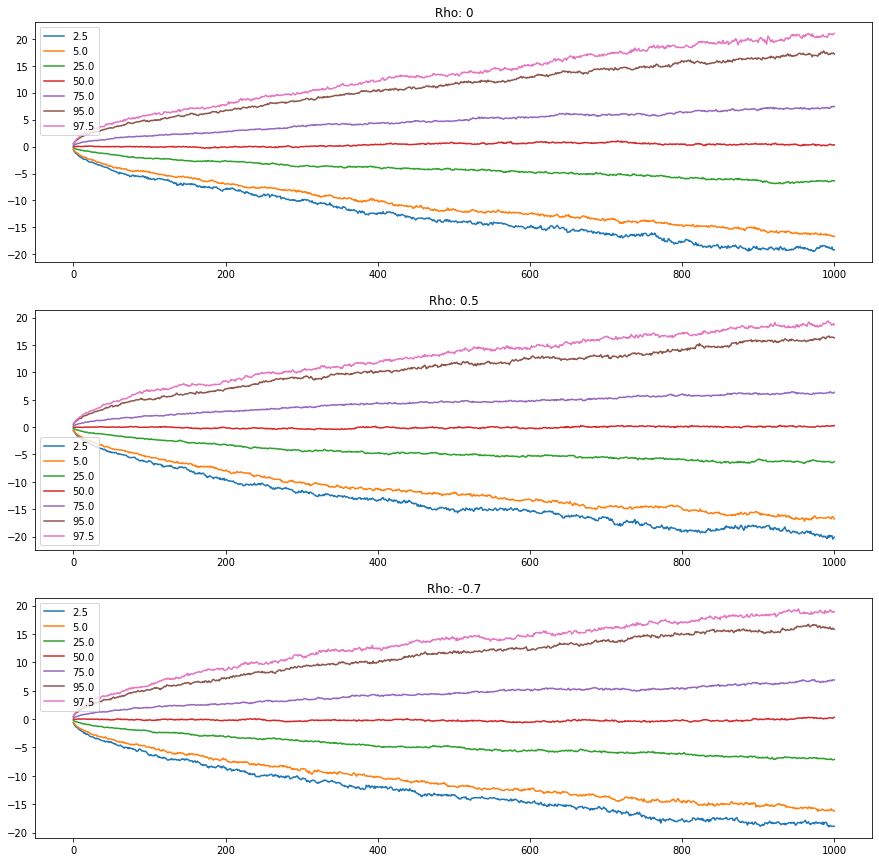

In [ ]:
rho = [0, 0.5, -0.7]
order = [1,2, np.inf]
fig, axs = plt.subplots(3)
for x in range(3):
  res = generate_quantile(rho[x], trajectories_length, trajectories_number, q)
  res.plot(ax = axs[x])
  axs[x].set_title(f'Rho: {rho[x]}')
  ax.set(xlabel='Time', ylabel='Process values')

fig.set_size_inches(15,15)
plt.show()

We can easily see that in every case plot seems similar. Probably, values of process don't depend on accepted values.

# 2. & 3. compare for diﬀerent $\tau$ ’s ensemble averaged MSD and EA-TA-MSD, on the same plot mark also sample conﬁdence intervals for every $\tau$ of TA-MSD

We generate data for this plot - compute TA-MSD for trajectories.





In [16]:
def generate_data_tau_plot(trajectories, tau):
  ta_msd_results = [ta_msd(t, tau, ord=2) for t in trajectories]
  return ea_msd(trajectories, tau), np.percentile(ta_msd_results, 5), np.mean(ta_msd_results), np.percentile(ta_msd_results, 95)

TA_MSD_MEAN is equivalent to EA_TA_MSD.

In [ ]:
taus = np.arange(10, 800, 50)


In [9]:
def generate_tau_plot(tau, trajectories_length, trajectories_number, rho, ord):
  trajectories = generate_trajectories(trajectories_length, rho, trajectories_number)
  results = [generate_data_tau_plot(trajectories, tau) for tau in taus]
  results = pd.DataFrame(results, index = taus, columns = ['EA_MSD', 'TA_MSD_5', 'TA_MSD_MEAN', 'TA_MSD_95'])
  return results

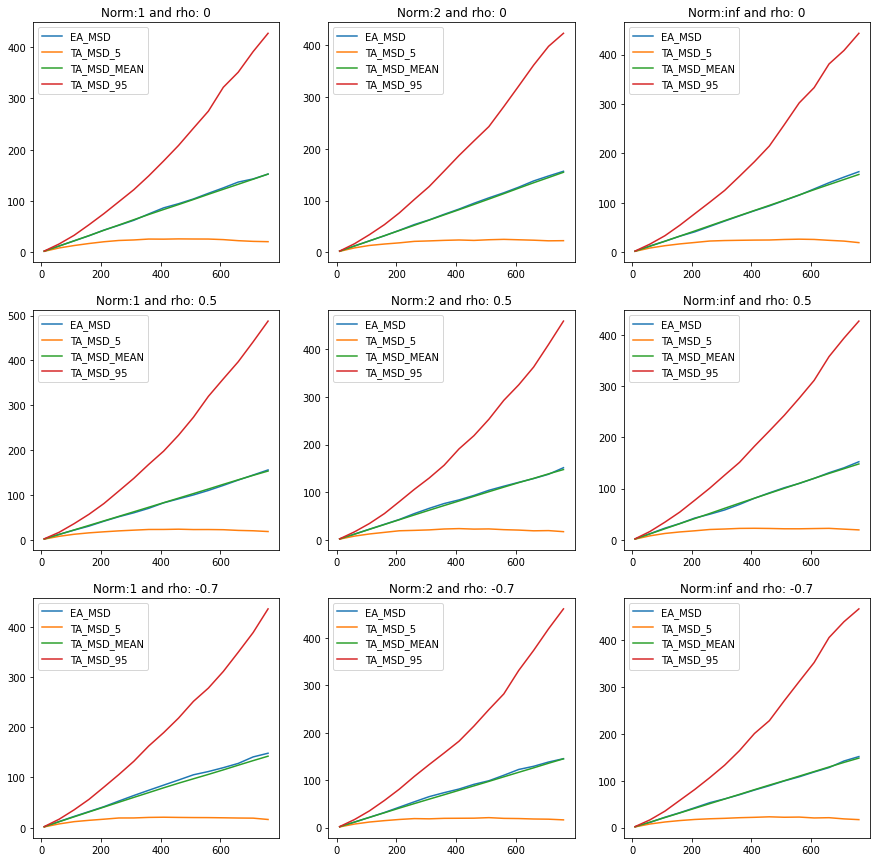

In [ ]:
fig, axs = plt.subplots(3, 3)
rho = [0, 0.5, -0.7]
order = [1,2, np.inf]
for x in range(3):
  for y in range(3): 
    res = generate_tau_plot(taus, trajectories_length, trajectories_number, rho[x], order[y])
    res.plot(ax = axs[x, y])
    axs[x, y].set_title('Norm:' + str(order[y]) + ' and rho: ' + str(rho[x]))
    ax.set(xlabel='Tau', ylabel='Values')

fig.set_size_inches(15,15)
plt.show()

# 4. ﬁt power law $(c\tau^\alpha)$ behaviour to the EA-TA-MSD and present exponent $\alpha$.

Power law takes form: 
$$ c\tau^{\alpha}. $$

Let's take $log_{10}$ and we get

$$ log_{10}(c\tau^{\alpha}) = log_{10}c + \alpha log_{10}\tau. $$
So to obtain $\alpha$ we need to fit linear regression to logarithmed data.

In [7]:
def fit_power_law(tau, y):
  alpha, c = np.polyfit(np.log10(tau), np.log10(y), deg = 1)
  return alpha, c

We try to fit power law behaviour to the EA-TA-MSD and present exponent $\alpha$ on the plots.

In [ ]:
fig, axs = plt.subplots(3, 3)
rho = [0, 0.5, -0.7]
order = [1,2, np.inf]
taus = np.arange(1,3)
for x in range(3):
  for y in range(3): 
    results = generate_tau_plot(taus, trajectories_length, trajectories_number, rho[x], order[y])
    y = results['TA_MSD_MEAN']
    alpha, c = fit_power_law(taus, y)
    f = 10**(c)*taus**(alpha)
    axs[x,y].plot(taus, f, label = 'Fitted')
    axs[x,y].plot(taus, y, label = 'Real')
    axs[x, y].set_title(plt.title(f'Tau power law. Alpha:{alpha}, Rho: {rho[x]}, Norm: {Order[y]}'))
    ax.set(xlabel='Tau', ylabel='Values')

fig.set_size_inches(15,15)
fig.legend()
plt.show()

# 5. Angle between vectors

For sample [xk(0),...,xk(n)],k = 1,2,...,N consider process on angles between time t and t + dt:
$$\phi_k^{dt}(t) = \text{angle between }x_k(t) \text{and} x_k(t + dt) − x_k(t), t = 0, 1, ..., n. $$
We can assume that every trajectory should behave the same and angles process should not depend on time. Plot histogram of such process φdt(·) by joining all φdt k (·) together. If possible, try to ﬁnd distribution of these angles. Repeat this procedure for diﬀerent dt’s (let’s say dt = time step and 10 · time step) and compare if anything changes.

Angle between vectors:

$$ \arccos\left({\frac{a \cdot b}{|a||b|}}\right) $$


In [ ]:
def angle_between_vectors(a, b, order=2):
  return np.arccos(np.dot(a, b)/np.linalg.norm(a, ord=order)*np.linalg.norm(b, ord=order))
  

def phi(vector, t, dt, order=2):
  return angle_between_vectors(vector[t], vector[t+dt] - vector[t], order=order)


def phi_all(trajectories_length, rho, trajectories_number , t, dt, order):
  trajectories = generate_trajectories(trajectories_length, rho, trajectories_number)
  return [phi(traj, t, dt, order=order) for traj in trajectories]  

Time step = 1, so we get dt equal to 1 and 10 and generate histogram.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


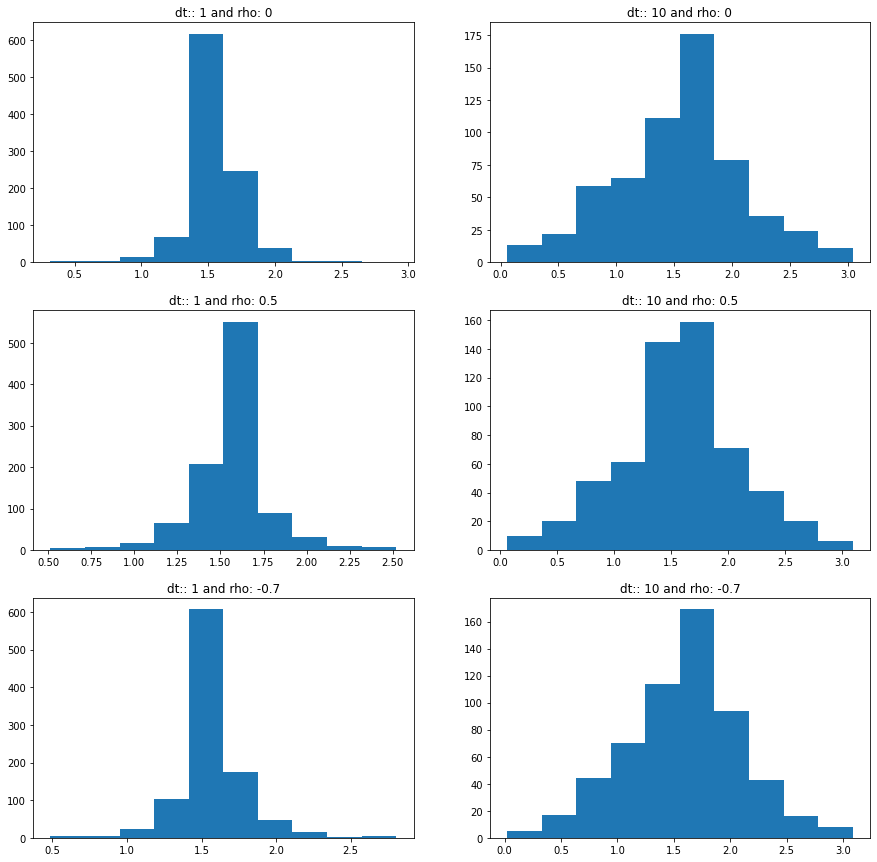

In [ ]:
dt =[1, 10]
t = 10
fig, axs = plt.subplots(3, 2)
for x in range(3):
  for y in range(2):
    res = phi_all(trajectories_length,rho[x], trajectories_number, t, dt[y], order = 2)
    axs[x, y].hist(res)
    axs[x, y].set_title(f'dt:: {dt[y]} and rho: {rho[x]}')

fig.set_size_inches(15,15)
plt.show()

We can assume that every trajectory behave the same and angles process not depend on time. The histograma of such process seems like normal distributions.
For different dt’s we don't observe anything big changes.

# Bibliography:
1. K.Burnecki, E.Kepten, J.Janczura, I.Bronshtein, Y.Garini, A.Weron (2012) ”Universal Algorithm for
Identification of Fractional Brownian Motion. A Case of Telomere Subdiffusion”, Biophysical Journal 103,
1839–1847.
2. Simulating Brownian motion (BM) and geometric Brownian
motion (GBM), http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-sim-BM.pdf
